# Code Contents
**=============================================**

1. Data upload
2. Histogram showing tweet count per class
3. Character length analysis: Comparison of the raw and cleaned tweets
4. Word count analysis of each tweet: No. of words per cleaned tweet set
5. Splitting data into:
    - Training and test set,
    - Training, validation and test set
6. Characted length analysis of each word in the vocabulary

 
**Average time of code execution = 3 seconds**

**=============================================**



In [1]:
# Import base libraries for mathematical operations, dataframes, time and plotting
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [5]:
# Code Starting time
t0 = time()

## 1. Upload data

In [6]:
class_names = ['Hate','Offensive','Neutral']
path = "datasets/balanced_dataset.csv"

In [7]:
# upload the dataset
data = pd.read_csv(path)
# drop any rows with null (after preprocessing)
data = data.dropna()
# print first 5 rows of the data set
data.head()

,labels,tweet,clean_tweet
0,0,"#sikh #temple vandalised in in #calgary, #wso ...",sikh temple vandalised in in calgary wso conde...
1,2,"@user @user @user on flipside of , praise @us...",on flipside of praise for reminder that reales...
2,2,RT @KatiePavlich: Charlie Crist doesn't have a...,charlie crist doesn t have any more political ...
3,0,@user you might be a libtard if... #libtard #...,you might be a libtard if libtard sjw liberal ...
4,0,RT @RihannaHasAids: aight game over. dykes had...,aight game over dykes had to ruin it


## 2. Histogram of original dataset

In [8]:
df_count = data.labels.value_counts(sort = False)

In [9]:
print("Size of dataset: {}".format(len(data)))
print('=='*30)
for i,j in enumerate(df_count):
    print('    Number of examples in the {} class: {}'.format(class_names[i],j))

Size of dataset: 19750
    Number of examples in the Hate class: 6580
    Number of examples in the Offensive class: 6585
    Number of examples in the Neutral class: 6585


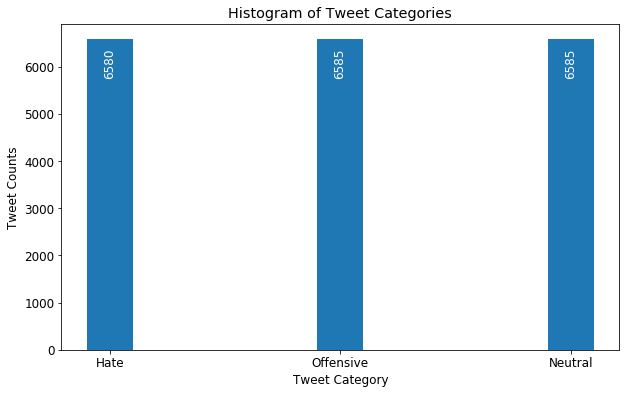

In [10]:
plt.figure(figsize = (10,6))
plt.hist(data.labels, align = 'left',bins = np.arange(0,2.4,0.2));

xtcks = [0,1,2]
plt.xticks(xtcks,class_names);
plt.xlabel('Tweet Category');
plt.ylabel('Tweet Counts');
plt.title('Histogram of Tweet Categories');
## Include the actual count per tweet
for i,j in enumerate(df_count):
    plt.text(i-0.03,j-400,j,color = 'white', rotation = '90')


## 3. Character length analysis

In [11]:
data['raw_length'] = data.tweet.apply(lambda t: len(t))
data['clean_length'] = data.clean_tweet.apply(lambda t: len(t))

In [12]:
data.head()

,labels,tweet,clean_tweet,raw_length,clean_length
0,0,"#sikh #temple vandalised in in #calgary, #wso ...",sikh temple vandalised in in calgary wso conde...,61,53
1,2,"@user @user @user on flipside of , praise @us...",on flipside of praise for reminder that reales...,107,79
2,2,RT @KatiePavlich: Charlie Crist doesn't have a...,charlie crist doesn t have any more political ...,131,111
3,0,@user you might be a libtard if... #libtard #...,you might be a libtard if libtard sjw liberal ...,69,54
4,0,RT @RihannaHasAids: aight game over. dykes had...,aight game over dykes had to ruin it,80,36


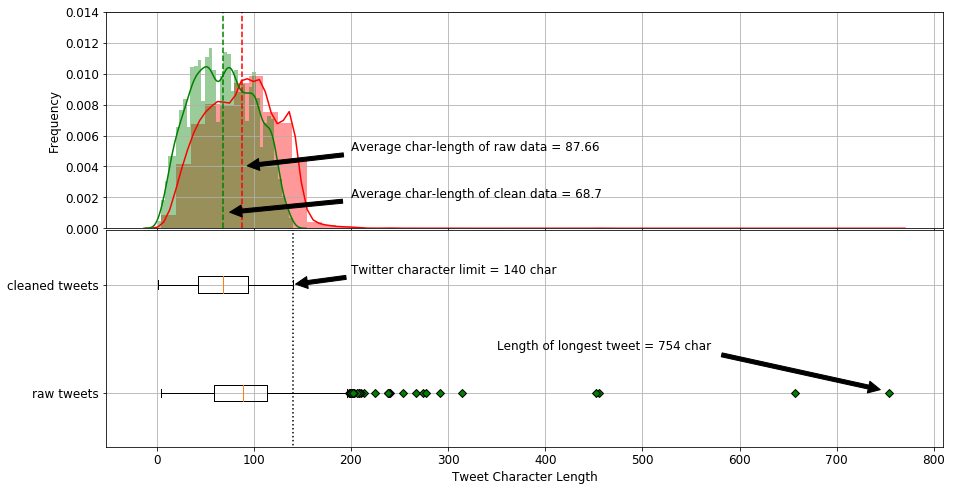

In [13]:
raw_max = max(data.raw_length)
clean_max = max(data.clean_length)

raw_mean = np.mean(data.raw_length)
clean_mean = np.mean(data.clean_length)


fig,(ax1,ax2)= plt.subplots(2,1,figsize = (15,8),sharex = True)
arrow_style = dict(facecolor='black', shrink=0.05)


############# Distplot of Character length #####################
sns.distplot(data.raw_length,color = 'red',
             label = 'raw tweets', ax = ax1)
sns.distplot(data.clean_length,color = 'green',
             label = 'cleaned tweets', ax = ax1)

#plt.legend(loc = 'upper right')

ax1.vlines(raw_mean,0,0.015,linestyle = "--",color = 'red')
ax1.vlines(clean_mean,0,0.015,linestyle = "--",color = 'green')

ax1.annotate('Average char-length of raw data = {}'.format(np.round(raw_mean,2)),
            xy=(raw_mean,0.004), xytext=(200,0.005),
            arrowprops=arrow_style);

ax1.annotate('Average char-length of clean data = {}'.format(np.round(clean_mean,2)),
            xy=(clean_mean,0.001), xytext=(200,0.002),
            arrowprops=arrow_style);


ax1.set_ylim([0, 0.014])

ax1.set(xticks = np.arange(0,900,100),
        xticklabels = '',
        xlabel = '',
        ylabel = 'Frequency')


ax1.grid()

############# Boxplot of Character length #####################
green_diamond = dict(markerfacecolor='g', marker='D')

ax2.boxplot([data.raw_length,data.clean_length],flierprops=green_diamond, vert = False);

# Vertical line at twitter character limit
ax2.vlines(140,0,3,linestyle = ':')



# Arrows pointing to the max of data
ax2.annotate(r'Length of longest tweet = {} char'.format(raw_max),
            xy=(raw_max,1.01), xytext=(350,1.4),
            arrowprops=arrow_style)
ax2.annotate('Twitter character limit = 140 char', xy=(140,2), xytext=(200,2.1),
            arrowprops=arrow_style)

ax2.set(xticks = np.arange(0,900,100),
        xticklabels = np.arange(0,900,100),
        xlabel = 'Tweet Character Length',
        yticklabels = ['raw tweets','cleaned tweets'])

ax2.grid()


plt.subplots_adjust(hspace=0.01)
plt.show()

## 4. Word count analysis

In [14]:
data['word_count'] = data.clean_tweet.apply(lambda t: len(t.split()))
data.head()

,labels,tweet,clean_tweet,raw_length,clean_length,word_count
0,0,"#sikh #temple vandalised in in #calgary, #wso ...",sikh temple vandalised in in calgary wso conde...,61,53,9
1,2,"@user @user @user on flipside of , praise @us...",on flipside of praise for reminder that reales...,107,79,13
2,2,RT @KatiePavlich: Charlie Crist doesn't have a...,charlie crist doesn t have any more political ...,131,111,21
3,0,@user you might be a libtard if... #libtard #...,you might be a libtard if libtard sjw liberal ...,69,54,10
4,0,RT @RihannaHasAids: aight game over. dykes had...,aight game over dykes had to ruin it,80,36,8


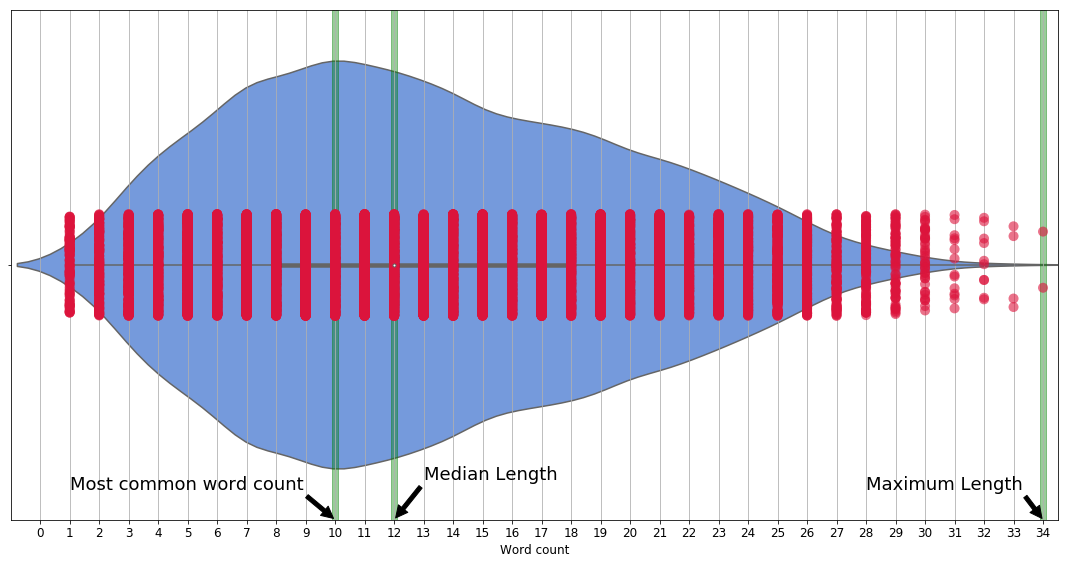

In [15]:
wc_median = np.median(data.word_count)
wc_most_common = np.argmax(data.word_count.value_counts())
wc_max = max(data.word_count)

fig,ax = plt.subplots(figsize = (15,8))

sns.stripplot(x=data["word_count"],size=10,marker="o",
              orient = 'h', jitter = 0.1,
              color = 'crimson',edgecolor="gray", alpha = 0.6)

sns.violinplot(x=data["word_count"],
               color = 'cornflowerblue')

ax.axvspan(wc_max-0.1, wc_max+0.1, ymin=0.0, ymax=1, alpha=0.4, color='green')
ax.axvspan(wc_most_common-0.1, wc_most_common+0.1, ymin=0.0, ymax=1, alpha=0.4, color='green')
ax.axvspan(wc_median-0.1, wc_median+0.1, ymin=0.0, ymax=1, alpha=0.4, color='green')

ax.annotate('Most common word count', xy=(wc_most_common,0.5), xytext=(1,0.44),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 18)

ax.annotate('Median Length', xy=(wc_median,0.5), xytext=(13,0.42),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 18)

ax.annotate('Maximum Length', xy=(wc_max,0.5), xytext=(28,0.44),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 18)

ax.set(xticklabels = np.arange(0,36,1),
       xlim = [-1, wc_max+0.5],
       xticks = np.arange(0,36,1),
       xlabel = 'Word count')

ax.xaxis.grid() 

plt.tight_layout()

## 5. Data split

### 5.1 Training-test sets

In [16]:
# Split the dataset into training and test sets (2:1)
x_train, x_test, y_train, y_test = train_test_split(data.clean_tweet, data.labels, test_size=0.33, random_state=42)

# Print
print(' '*20,'Training-Test Split')
print('=='*30)
print('Size of training data: {}'.format(len(y_train)))
print('=='*30)
df_count_train = y_train.value_counts(sort = False)
for i,j in enumerate(df_count_train):
    print('    Number of training examples in {} class: {}'.format(class_names[i],j))
    
print('=='*30)
print('Size of test data: {}'.format(len(y_test)))
print('=='*30)
df_count_test = y_test.value_counts(sort = False)
for i,j in enumerate(df_count_test):
    print('    Number of training examples in {} class: {}'.format(class_names[i],j))

                     Training-Test Split
Size of training data: 13232
    Number of training examples in Hate class: 4380
    Number of training examples in Offensive class: 4411
    Number of training examples in Neutral class: 4441
Size of test data: 6518
    Number of training examples in Hate class: 2200
    Number of training examples in Offensive class: 2174
    Number of training examples in Neutral class: 2144


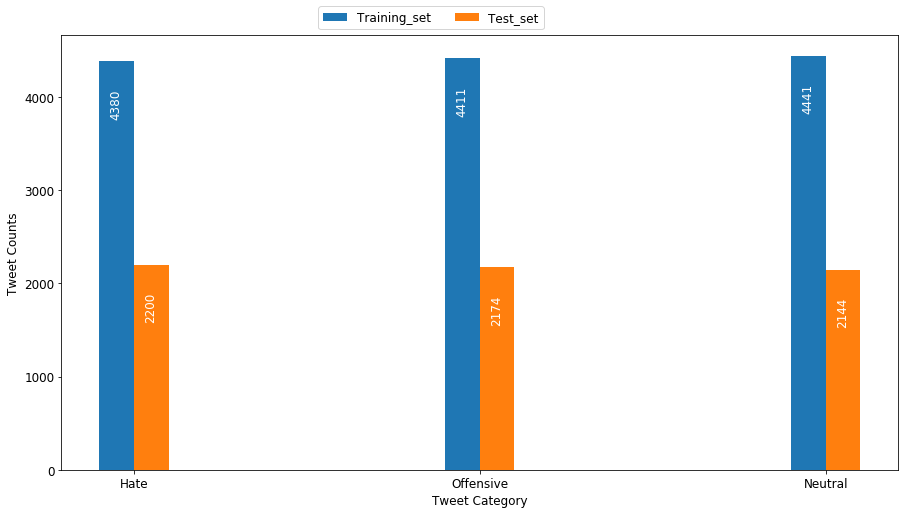

In [17]:
plt.figure(figsize = (15,8))
plt.hist([y_train,y_test], align = 'left',bins = np.arange(0,2.4,0.2),rwidth = 20,
        label = ['Training_set','Test_set']);

xtcks = [0,1,2]
plt.xticks(xtcks,class_names);
plt.xlabel('Tweet Category');
plt.ylabel('Tweet Counts');
plt.legend( bbox_to_anchor=(0.3, 1), ncol=2)

## Include the actual count per tweet
for i,j in enumerate(df_count_train):
    plt.text(i-0.07,j-400,j,color = 'white', rotation = '90')

for i,j in enumerate(df_count_test):
    plt.text(i+0.03,j-400,j,color = 'white', rotation = '90')

### 5.2 Training-validation-test set

In [18]:
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

# Print
print(' '*20,'Training-Validation-Test Split')

print('=='*30)
print('Size of training data: {}'.format(len(Y_train)))
print('=='*30)
df_count_train = Y_train.value_counts(sort = False)
for i,j in enumerate(df_count_train):
    print('    Number of training examples in {} class: {}'.format(class_names[i],j))

print('=='*30)
print('Size of validation data: {}'.format(len(y_val)))
print('=='*30)
df_count_val = y_val.value_counts(sort = False)
for i,j in enumerate(df_count_val):
    print('    Number of training examples in {} class: {}'.format(class_names[i],j))

print('=='*30)
print('Size of test data: {}'.format(len(y_test)))
print('=='*30)
df_count_test = y_test.value_counts(sort = False)
for i,j in enumerate(df_count_test):
    print('    Number of training examples in {} class: {}'.format(class_names[i],j))

                     Training-Validation-Test Split
Size of training data: 8865
    Number of training examples in Hate class: 2947
    Number of training examples in Offensive class: 2933
    Number of training examples in Neutral class: 2985
Size of validation data: 4367
    Number of training examples in Hate class: 1433
    Number of training examples in Offensive class: 1478
    Number of training examples in Neutral class: 1456
Size of test data: 6518
    Number of training examples in Hate class: 2200
    Number of training examples in Offensive class: 2174
    Number of training examples in Neutral class: 2144


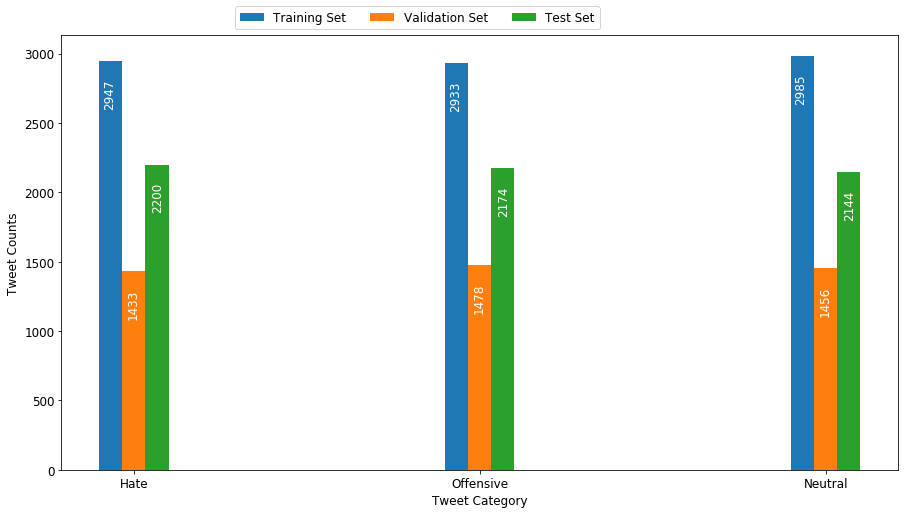

In [19]:
plt.figure(figsize = (15,8))
plt.hist([Y_train,y_val,y_test], align = 'left',bins = np.arange(0,2.4,0.2),rwidth = 100,
        label = ['Training Set','Validation Set','Test Set']);

xtcks = [0,1,2]
plt.xticks(xtcks,class_names);
plt.xlabel('Tweet Category');
plt.ylabel('Tweet Counts');
plt.legend( bbox_to_anchor=(0.2, 1), ncol=3)

## Include the actual count per tweet
for i,j in enumerate(df_count_train):
    plt.text(i-0.09,j-200,j,color = 'white', rotation = '90')
    
for i,j in enumerate(df_count_val):
    plt.text(i-0.02,j-200,j,color = 'white', rotation = '90')

for i,j in enumerate(df_count_test):
    plt.text(i+0.05,j-200,j,color = 'white', rotation = '90')

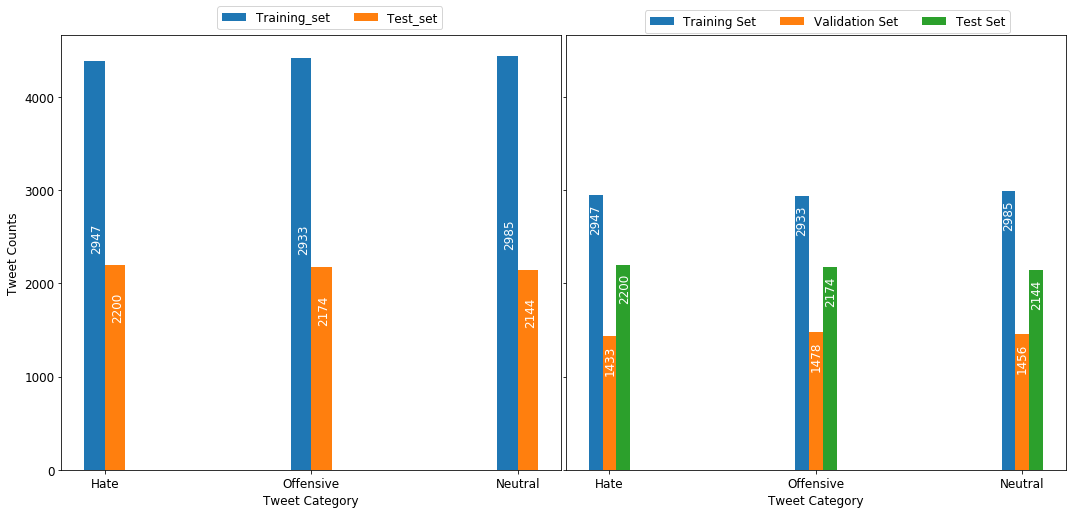

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (18,8))

ax1.hist([y_train,y_test], align = 'left',bins = np.arange(0,2.4,0.2),rwidth = 20,
        label = ['Training_set','Test_set']);

xtcks = [0,1,2]
ax1.set(xticks = xtcks,
        xticklabels = class_names,
        xlabel = 'Tweet Category',
        ylabel = 'Tweet Counts')

ax1.legend(bbox_to_anchor=(0.3, 1), ncol=2)

## Include the actual count per tweet
for i,j in enumerate(df_count_train):
    ax1.text(i-0.07,j-400,j,color = 'white', rotation = '90')

for i,j in enumerate(df_count_test):
    ax1.text(i+0.03,j-400,j,color = 'white', rotation = '90')

ax2.hist([Y_train,y_val,y_test], align = 'left',bins = np.arange(0,2.4,0.2),rwidth = 100,
        label = ['Training Set','Validation Set','Test Set']);

ax2.set(xticks = xtcks,
        xticklabels = class_names,
        xlabel = 'Tweet Category')
ax2.legend( bbox_to_anchor=(0.9, 1.07), ncol=3)

## Include the actual count per tweet
for i,j in enumerate(df_count_train):
    ax2.text(i-0.1,j-200,j,color = 'white', rotation = '90')
    
for i,j in enumerate(df_count_val):
    ax2.text(i-0.03,j-200,j,color = 'white', rotation = '90')

for i,j in enumerate(df_count_test):
    ax2.text(i+0.04,j-200,j,color = 'white', rotation = '90')

plt.subplots_adjust(wspace=0.01)
plt.show()

## 6. Vocabulary character length analysis

### Tokenization

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
vocab_size = len(tokenizer.word_index)+1
print('Total vocab size: {}'.format(vocab_size))

Total vocab size: 18602


In [22]:
word_list = []
# for each word in dictionary extract their lengths
for word,i in tokenizer.word_index.items():
    word_list.append(len(word))
   

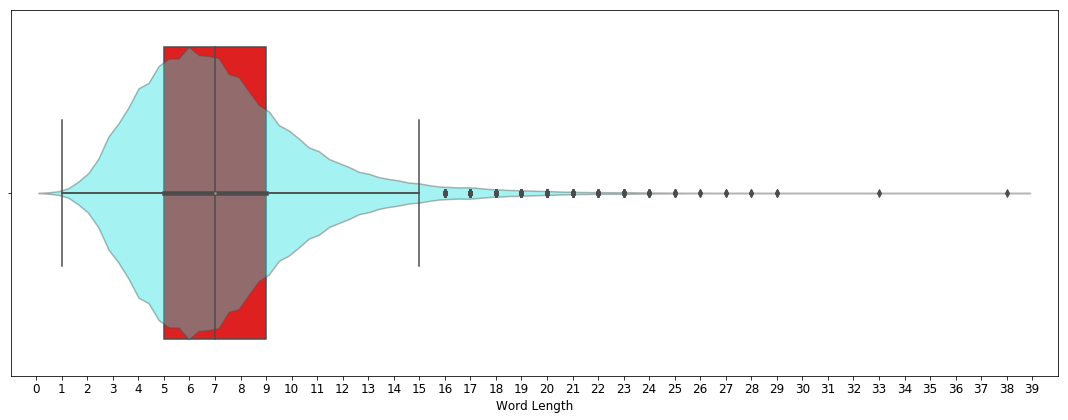

In [23]:
fig,ax = plt.subplots(figsize = (15,6))

sns.violinplot(word_list,color = 'cyan', alpha = 0.2)
sns.boxplot(word_list,color = 'red')

ax.set(xticks = np.arange(0,40,1),
       xticklabels=np.arange(0,41,1),
       xlim = [-1,40],
       xlabel ='Word Length')

# aplha = 0.4 does not work in new version of seaborn: use collections
plt.setp(ax.collections, alpha=.4) 
plt.tight_layout()


In [24]:
# Code End Time
t1 = time()

In [25]:
code_time = t1 - t0
print("=="*30)
print('Total Code Execution Time: {} seconds'. format(np.round(code_time),4))
print("=="*30)

Total Code Execution Time: 3.0 seconds
